# Librerías

In [1]:
#Librería para crear modelo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')   
    return df

# 1. Analisis de Datos

Para este analisis utilizaremos un dataset sobre el rendimiento de estudiantes en distintas materias, asociados con
otros factores como el el estudio de los padres, alimentación, preparación, ect.

In [3]:
data = leer_datos("StudentsPerformance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Dimensiones del dataset
data.shape
#cantidad de datos (filas x columnas)

(1000, 8)

In [6]:
"""Analizo valores, en este caso NO tenemos datos nullos"""
data.isna().sum().sort_values()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

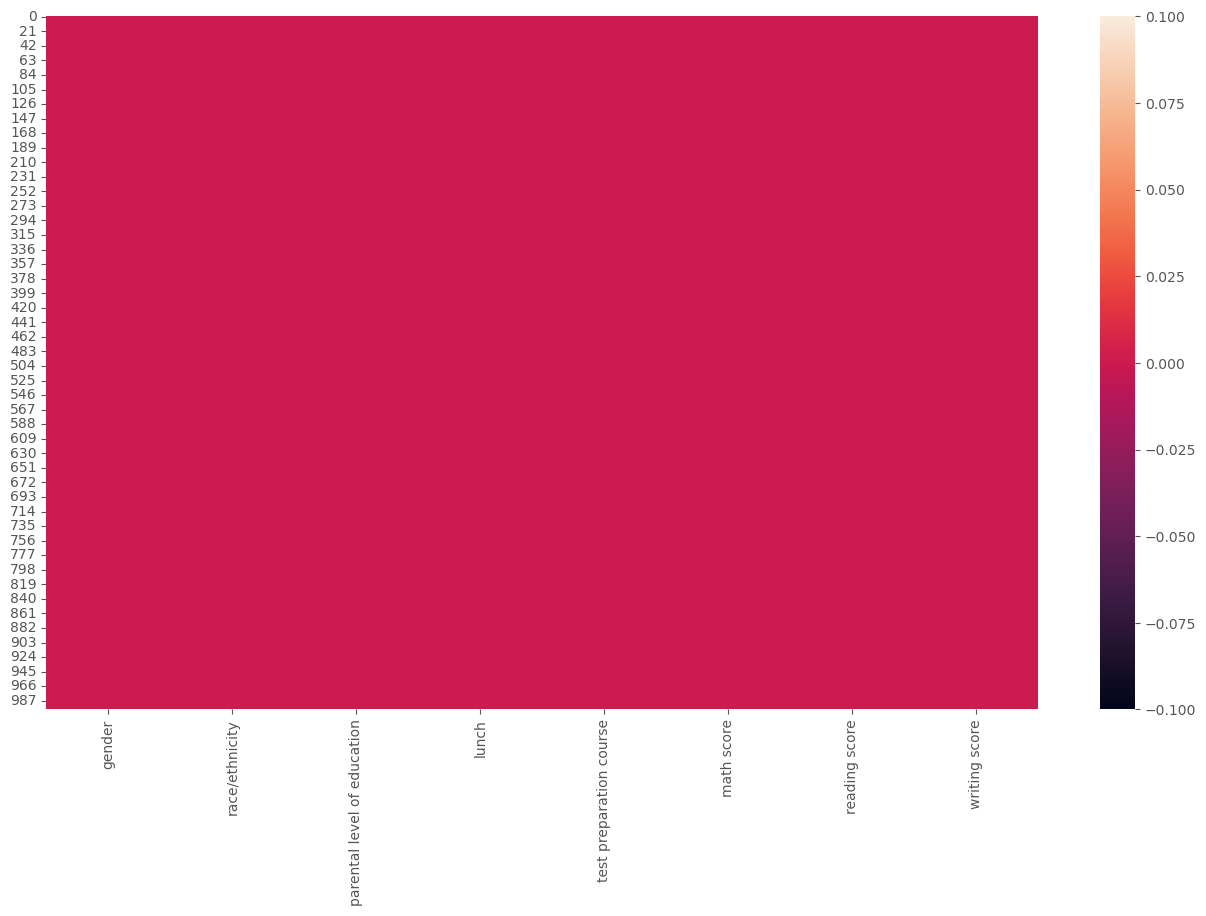

In [7]:
"""los espacios en blanco representan los valores faltantes/nulos"""
sns.heatmap(data.isna())

In [8]:
#Renombramos el nombre de las columnas
#género,Etnia,Nivel de educación de los padres,almuerzo,Curso de preparación para exámenes,matematica, lectura, escritura
data=data.rename(columns={'gender':'Género', 'race/ethnicity':'Etnia', 'parental level of education':'Estudio_Padres',
       'lunch':'Almuerzo', 'test preparation course':'Preparación_exámenes','math score':'Matemáticas','reading score':'Lectura',
                          'writing score':'Escritura'})
#data.Bedrooms.value_counts() 

In [9]:
#Pasamos a datos alfanúmericos
pd.get_dummies(data["Almuerzo"])

,free/reduced,standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,0,1
996,1,0
997,1,0
998,0,1


In [10]:
"""basta con mostrar una columna"""
genero = pd.get_dummies(data["Género"], drop_first=True)
genero.head(3)

,male
0,0
1,0
2,0


In [11]:
#se añade al dataset y borro la que ya no hace falta
data = pd.concat([data,genero],axis=1)
data.head(10)

,Género,Etnia,Estudio_Padres,Almuerzo,Preparación_exámenes,Matemáticas,Lectura,Escritura,male
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,0
7,male,group B,some college,free/reduced,none,40,43,39,1
8,male,group D,high school,free/reduced,completed,64,64,67,1
9,female,group B,high school,free/reduced,none,38,60,50,0


In [12]:
#Eliminamos anterior columna
data.drop("Género",axis=1,inplace=True)
#Renombramos la nueva columna
data=data.rename(columns={'male':'Género'})
data.head(4)

,Etnia,Estudio_Padres,Almuerzo,Preparación_exámenes,Matemáticas,Lectura,Escritura,Género
0,group B,bachelor's degree,standard,none,72,72,74,0
1,group C,some college,standard,completed,69,90,88,0
2,group B,master's degree,standard,none,90,95,93,0
3,group A,associate's degree,free/reduced,none,47,57,44,1


Realizaremos los mismo pasos con todas las columnas para pasarlas a datos númericos,
En caso de valores categóricos (por ej. Hombre/Mujer o Ninguno/Completado, Terror, Novela,etc) 
se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”,
pero para este caso no es grande la cantidad de tipos de dato en cada columna por lo que no habrá mucho conflicto, en la mayoria de columnas existe solo dos tipos de categorías.

# 2. Mapeo de Datos 

### Almuerzo

In [13]:
#Número de categorías columna Almuerzo: 2
data.Almuerzo.value_counts()

standard        645
free/reduced    355
Name: Almuerzo, dtype: int64

In [14]:
#Pasamos a datos alfanúmericos
pd.get_dummies(data["Almuerzo"])

,free/reduced,standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,0,1
996,1,0
997,1,0
998,0,1


In [15]:
#Mostraremos una sola columna
almuerzo = pd.get_dummies(data["Almuerzo"], drop_first=True)
"""
standard(costoso)=1
free(gratis/reducido)=0
"""

'\nstandard(costoso)=1\nfree(gratis/reducido)=0\n'

In [16]:
#se añade al dataset y borro la que ya no hace falta
data = pd.concat([data,almuerzo],axis=1)
data.drop("Almuerzo",axis=1,inplace=True)


In [17]:
#Renombramos la nueva columna
data=data.rename(columns={'standard':'Almuerzo'})
data.head(4)

,Etnia,Estudio_Padres,Preparación_exámenes,Matemáticas,Lectura,Escritura,Género,Almuerzo
0,group B,bachelor's degree,none,72,72,74,0,1
1,group C,some college,completed,69,90,88,0,1
2,group B,master's degree,none,90,95,93,0,1
3,group A,associate's degree,none,47,57,44,1,0


### Preparación para exámenes

In [18]:
#Número de categorías columna Preparación_exámenes: 2
data.Preparación_exámenes.value_counts()


none         642
completed    358
Name: Preparación_exámenes, dtype: int64

In [19]:
#Pasamos a datos alfanúmericos
pd.get_dummies(data["Preparación_exámenes"])

,completed,none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [20]:
#Mostraremos una sola columna
examenes = pd.get_dummies(data["Preparación_exámenes"], drop_first=True)
"""
none=1
completed=0
"""

'\nnone=1\ncompleted=0\n'

In [21]:
#se añade al dataset y borro la que ya no hace falta
data = pd.concat([data,examenes],axis=1)
data.drop("Preparación_exámenes",axis=1,inplace=True)

In [22]:
#Renombramos la nueva columna
data=data.rename(columns={'none':'Preparación_exámenes'})
data.head(10)

,Etnia,Estudio_Padres,Matemáticas,Lectura,Escritura,Género,Almuerzo,Preparación_exámenes
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,1,0
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,0,1
4,group C,some college,76,78,75,1,1,1
5,group B,associate's degree,71,83,78,0,1,1
6,group B,some college,88,95,92,0,1,0
7,group B,some college,40,43,39,1,0,1
8,group D,high school,64,64,67,1,0,0
9,group B,high school,38,60,50,0,0,1


### Etnias 

In [23]:
#Número de categorías columna Etnia: 5
data.Etnia.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Etnia, dtype: int64

In [24]:
#Pasamos a datos alfanúmericos
hashEtnias = {
  1: 'group A',
  2: 'group B',
  3: 'group C',
  4: 'group D',
  5: 'group E'
}

In [25]:
data['Etnia'] = data['Etnia'].replace(
  # Reemplaza cada valor por el valor en la segunda lista en el mismo índice del match.
  hashEtnias.values(), # Lista de Strings
  hashEtnias.keys() # Lista de Números
)
data.head(4)

,Etnia,Estudio_Padres,Matemáticas,Lectura,Escritura,Género,Almuerzo,Preparación_exámenes
0,2,bachelor's degree,72,72,74,0,1,1
1,3,some college,69,90,88,0,1,0
2,2,master's degree,90,95,93,0,1,1
3,1,associate's degree,47,57,44,1,0,1


### Nivel de Estudio de los Padres

In [26]:
data.Estudio_Padres.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Estudio_Padres, dtype: int64

In [27]:
#Pasamos a datos alfanúmericos
hashEstudios = {
  1: 'some college',
  2: "associate's degree",
  3: "high school",
  4: 'some high school',
  5: "bachelor's degree",
  6: "master's degree"
}

In [28]:
data['Estudio_Padres'] = data['Estudio_Padres'].replace(
  # Reemplaza cada valor por el valor en la segunda lista en el mismo índice del match.
  hashEstudios.values(), # Lista de Strings
  hashEstudios.keys() # Lista de Números
)
data.head(4)

,Etnia,Estudio_Padres,Matemáticas,Lectura,Escritura,Género,Almuerzo,Preparación_exámenes
0,2,5,72,72,74,0,1,1
1,3,1,69,90,88,0,1,0
2,2,6,90,95,93,0,1,1
3,1,2,47,57,44,1,0,1


# 2. Implementación del modelo

Creamos nuestro x(los sets de entrenamiento) e y(variable dependiente)

In [31]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


### Dividimos los datos

In [32]:
# Crear arrays de entrenamiento y las etiquetas que indican los resultados sobre su preparación de exámenes o no. 

x_train, x_test, y_train, y_test  = train_test_split(data.iloc[:,:-1],
                                                     data["Preparación_exámenes"],
                                                     test_size = 0.3)

In [33]:
#Determinamos el mejor valor de k(vecinos) para una mejor precisión
# Almacenar la precisión para cada valor de k en este caso probamos con valores del 1,20
accuracies = []
k_values = list(range(1, 20))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracies.append(accuracy)

C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

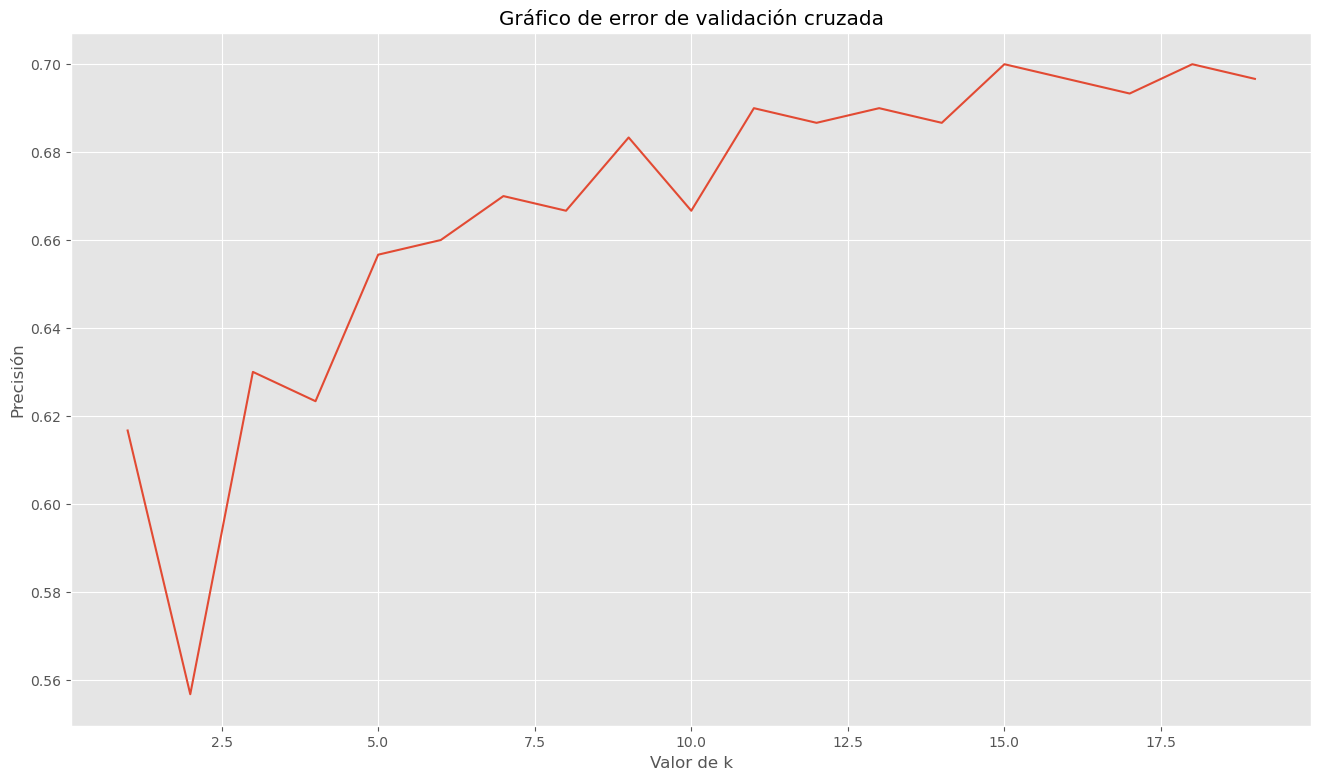

In [34]:
# Trazar el gráfico de error de validación cruzada
plt.plot(k_values, accuracies)
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Gráfico de error de validación cruzada')
plt.show()

#Valor k=15 ---> mayor precisión

### Creación del modelo

In [50]:
#Determinamos el mejor valor de k(vecinos) para una mejor precisión
n_neighbors = 15

modelo_knn = KNeighborsClassifier(n_neighbors)

#Entrenamos el modelo
modelo_knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=15)

### Pruebas

In [37]:
#Evaluación del modelo
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.70


C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [54]:
#Prediccion con el modelo
y_pred = modelo_knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.36      0.46       107
           1       0.72      0.89      0.79       193

    accuracy                           0.70       300
   macro avg       0.68      0.63      0.63       300
weighted avg       0.69      0.70      0.67       300



C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
print(confusion_matrix(y_test, pred))

[[ 39  68]
 [ 22 171]]
